In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Start by importing the data into python to create a data frame (df) #
df = pd.read_stata('C:/Users/mauri/github/Econometrics-741/HW2.dta')

# Let's do exploratory data analysis before we start working with the df.
print(df.shape)  # ( 6718, 8) Number of rows, number of columns'
print(df.info())  # 'Complete summary of data types and entries'
print(df.head(5))  # 'Visualize the first 5 entries of dt'

# Age column data type is in a categorical form thus need to be
# transform to interget format for filter to work.
df = df.astype({'age': 'int32'})
print(df.dtypes)

(6718, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 6717
Data columns (total 8 columns):
perwt      6718 non-null int16
sex        6718 non-null category
age        6718 non-null category
race       6718 non-null category
hispan     6718 non-null category
empstat    6718 non-null category
occ1990    6718 non-null category
incwage    6718 non-null int32
dtypes: category(6), int16(1), int32(1)
memory usage: 133.6 KB
None
   perwt     sex age   race        hispan   empstat     occ1990  incwage
0     71  female  30  white  not hispanic  employed  physicians    53000
1    146    male  27  white  not hispanic  employed  physicians    50000
2    202    male  45  white  not hispanic  employed  physicians   391000
3    136  female  50  white  not hispanic  employed  physicians   391000
4    132  female  54  white  not hispanic  employed  physicians   391000
perwt         int16
sex        category
age           int32
race       category
hispan     category
empstat    c

In [3]:
# Filter data to women who are employed and age between 30 to 39
df2 = df.loc[(df.empstat == 'employed') & (df.age >= 35) & (df.sex == 'female')]

print(df2.shape)  # '(4700, 8) Number of rows and columns'

# Sort Variables
x = df2[['age']]
y = df2[['incwage']]

# Fit x and y into Linear Regression Model
model = LinearRegression()
model.fit(x, y)

print(model.intercept_)
print(model.coef_)

# y_hat = 171886.32905437 + 1349.45725237age

(1994, 8)
[171886.32905437]
[[1349.45725237]]


In [4]:
# Reproduce scikit-learn results with linear algebra
N = len(x)
p = len(x.columns) + 1  # plus one because LinearRegression adds an intercept term


X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = x.values

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y.values
print(beta_hat)

# y_hat = 171886.32905437 + 1349.45725237age

# Compute standard errors of the parameter estimates
y_hat = model.predict(x)
residuals = y.values - y_hat
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(p):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")

# SE(beta_hat[0]): 25328.832831136446
# SE(beta_hat[1]): 570.3044786642951

[[171886.32905437]
 [  1349.45725237]]
SE(beta_hat[0]): 25328.83283113632
SE(beta_hat[1]): 570.3044786642922


In [5]:
# Confirm with statsmodels
ols = sm.OLS(y.values, X_with_intercept)
ols_result = ols.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.599
Date:                Wed, 07 Oct 2020   Prob (F-statistic):             0.0181
Time:                        09:53:26   Log-Likelihood:                -26641.
No. Observations:                1994   AIC:                         5.329e+04
Df Residuals:                    1992   BIC:                         5.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.719e+05   2.53e+04      6.786      0.0

In [6]:
# Chapter 6 Questions
# 1. Continuing with the regressions from above, report results using White’s
# Heteroskedasticity Robust Standard Errors.
ols = sm.RLM(y.values, X_with_intercept)
ols_robust = ols.fit()
print(ols_robust.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                 1994
Model:                            RLM   Df Residuals:                     1992
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 07 Oct 2020                                         
Time:                        09:53:33                                         
No. Iterations:                     3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.662e+05    2.6e+04      6.390      0.0

In [9]:
# 2 Let’s see how earnings varies with age. Take the log of earnings before
# running these regressions. Now please use both men and women
# who are employed and 35 years older or more.

df3 = df.loc[(df.empstat == 'employed') & (df.age >= 35)]
df3['lnwage'] = np.log(df3.incwage)
df3['age2'] = np.power((df3.age), 2)
df3['age3'] = np.power((df3.age), 3)
df3['MFX'] = np.array(0.7628+2*-0.0161*df3['age']+3 * 0.0001*df3['age2'])

C:\Users\mauri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mauri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\mauri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [10]:
# a) Run a linear regression of earnings on age.
x = df3[['age']]
y = df3[['lnwage']]

# Reproduce scikit-learn results with linear algebra
N = len(x)
p = len(x.columns) + 1  # plus one because LinearRegression adds an intercept term


X_with_intercept1 = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept1[:, 0] = 1
X_with_intercept1[:, 1:p] = x.values

ols = sm.OLS(y.values, X_with_intercept1)
ols_result_ln = ols.fit()
y_hat1 = ols_result_ln.predict(X_with_intercept1)
print(ols_result_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     47.41
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           6.51e-12
Time:                        10:11:28   Log-Likelihood:                -5783.8
No. Observations:                4700   AIC:                         1.157e+04
Df Residuals:                    4698   BIC:                         1.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6920      0.090    130.578      0.0

In [11]:
#  (b) Run a quadratic regression of earnings on age. (4 points)
x = df3[['age', 'age2']]
y = df3[['lnwage']]

# Reproduce scikit-learn results with linear algebra
N = len(x)
p = len(x.columns) + 1  # plus one because LinearRegression adds an intercept term


X_with_intercept2 = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept2[:, 0] = 1
X_with_intercept2[:, 1:p] = x.values

ols = sm.OLS(y.values, X_with_intercept2)
ols_result_ln2 = ols.fit()
y_hat2 = ols_result_ln2.predict(X_with_intercept2)
print(ols_result_ln.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     47.41
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           6.51e-12
Time:                        10:11:32   Log-Likelihood:                -5783.8
No. Observations:                4700   AIC:                         1.157e+04
Df Residuals:                    4698   BIC:                         1.158e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6920      0.090    130.578      0.0

In [12]:
#  (c) Run a cubic regression of earnings on age.
x = df3[['age', 'age2', 'age3']]
y = df3[['lnwage']]

# Reproduce scikit-learn results with linear algebra
N = len(x)
p = len(x.columns) + 1  # plus one because LinearRegression adds an intercept term


X_with_intercept3 = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept3[:, 0] = 1
X_with_intercept3[:, 1:p] = x.values

ols = sm.OLS(y.values, X_with_intercept3)
ols_result_ln3 = ols.fit()
y_hat3 = ols_result_ln3.predict(X_with_intercept3)
print(ols_result_ln3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     18.02
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           1.27e-11
Time:                        10:11:35   Log-Likelihood:                -5780.5
No. Observations:                4700   AIC:                         1.157e+04
Df Residuals:                    4696   BIC:                         1.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2427      6.158      0.039      0.9

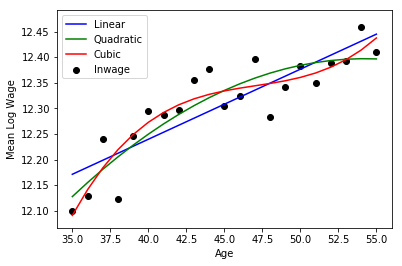

In [13]:
# (d) Present the results from your three regressions in one graph. (4
# points)
df4 = pd.DataFrame(list(zip(df3['age'], y_hat1, y_hat2, y_hat3, df3['lnwage'])),
                   columns=['age', 'yhat1', 'yhat2', 'yhat3', 'lnwage'])

df5 = df4.groupby(['age'], as_index=False).mean()

plt.scatter(df5['age'], df5['lnwage'],  color='black')
plt.plot(df5['age'], df5['yhat1'], color='blue', label='Linear')
plt.plot(df5['age'], df5['yhat2'], color='green', label='Quadratic')
plt.plot(df5['age'], df5['yhat3'], color='red', label='Cubic')
plt.legend()
plt.ylabel('Mean Log Wage')
plt.xlabel('Age')
plt.show()

In [14]:
# (e) Make an argument about which specification is best. (6 points)
# In this case just by looking at the graph, the cubic regression seems
# to fit the data better than the others. After analyzing the $r^2$
# coefficients of each regression, it can be noticed that the cubic regression
# does have the greatest value, which indicates a better positive fit.

In [15]:
# (f) Using the cubic, let’s explore marginal effects.
agebar = np.mean(df3['age'])
age2bar = np.mean(df3['age2'])
# i. Report the average marginal effect of age on earnings. Do
# not use the MFX command! (3 points)

print(df3['MFX'].describe())

# ii Also report the average of the marginal effects. Do not use
# the MFX command! (3 points)

MFX_bar = np.array(0.7628+2*-0.0161*agebar+3*0.0001*age2bar)
print(MFX_bar)

count    4700.000000
mean       -0.065647
std         0.033673
min        -0.101200
25%        -0.097200
50%        -0.078700
75%        -0.036700
max         0.003300
Name: MFX, dtype: float64
-0.0656471914893616


In [20]:
# 3 We are now going to explore some racial wage gaps. (15 points)
print(df.race.unique())
print(df.hispan.unique())

[white, other asian or pacific islander, chinese, black/african american, two major races, other race, nec, american indian or alaska native, three or more major races, japanese]
Categories (9, object): [white < black/african american < american indian or alaska native < chinese ... other asian or pacific islander < other race, nec < two major races < three or more major races]
[not hispanic, other, mexican, puerto rican, cuban]
Categories (5, object): [not hispanic < mexican < puerto rican < cuban < other]


In [32]:
df6 = df.groupby(['race'])['incwage'].describe()
print(df6)

                                   count           mean            std  \
race                                                                     
white                             4617.0  234900.498159  175028.365399   
black/african american             287.0  204353.310105  166312.604537   
american indian or alaska native    14.0  268928.571429  189859.650303   
chinese                            363.0  216068.044077  172744.216982   
japanese                            20.0  174000.000000  140553.791913   
other asian or pacific islander   1156.0  228271.193772  169672.582358   
other race, nec                     43.0  157737.209302  177780.517470   
two major races                    196.0  206482.653061  175188.686864   
three or more major races           22.0  215590.909091  161975.794515   

                                      min      25%       50%       75%  \
race                                                                     
white                               3